# Programming for Data Analysis
## Project 1 
## Title: IQ Test 
### Author: Andras Csullog

![IQ](https://www.arealme.com/newimg/tn_@2x_iq-2019.png)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [26]:
mtype = 'i4, S10'
iqm = np.array((np.random.normal(100 , 18 , 1000), "male"),  dtype=mtype)
iqf = np.array((np.random.normal(100 , 12 , 1000), "female"),  dtype=mtype)
iqx = np.concatenate((iqm, iqf))
# res = np.array(("TEXT", 1, 1), dtype='|S4, i4, i4')


print(iqx)


ValueError: setting an array element with a sequence.

ConversionError: Failed to convert value(s) to axis units: array(['male'], dtype='<U4')

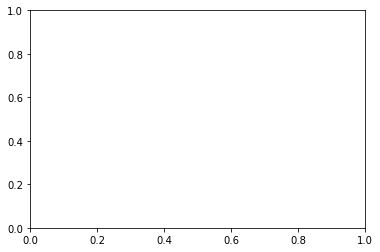

In [27]:
plt.hist(iqm)
#plt.hist(parentsiq)
plt.show()

In [5]:
dobym = np.random.randint(1900, 2000, 1000)
dobyf = np.random.randint(1900, 2000, 1000)
doby_x = np.concatenate((dobym, dobyf))

In [6]:
flynn_iqm = (dobym-1900)* 0.3 + iqm
flynn_iqf = (dobyf-1900)* 0.3 + iqf
flynn_x =  np.concatenate((flynn_iqm, flynn_iqf))

In [7]:
def NormalizeData(flynn_x):
    return (flynn_x - np.min(flynn_x)) / (np.max(flynn_x) - np.min(flynn_x))*100
scaled_x = NormalizeData(flynn_x)
social_economics = np.round(scaled_x)
# print(social_economics)

In [17]:
import pandas as pd
df = pd.DataFrame({"IQ Score" : flynn_x, "Social Economics" : social_economics,"DOB_Year" : doby_x})
df['Gender'] = df['IQ Score'].apply(lambda x: 'male' if x == flynn_iqm else 'Female')
print(df)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
import seaborn as sns 
df = pd.DataFrame({"IQM": iqm, "IQF" : iqf})
# sns.distplot(df['IQM'],hist=False,color='orange',)
# sns.distplot(df['IQF'],hist=False,color='blue')
sns.kdeplot(data=df, palette=['red', 'blue'])